# Individual codes of project5 and project9

## author: Xiaohuan Pei(6603592)

# Project 5

In [33]:
import os 
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import progressbar
files=os.listdir('learn/')
cnt=2
data=[]
for file in files:
    with open('learn/'+file,'r') as fi:#from path read file
        for line in fi:
            seg=line.split()#split the line by blank
            tmp=[]
            for i in range(len(seg)):
                if i==cnt:
                    continue
                tmp.append(float(seg[i]))#save the number to list
            data.append(tmp)#save one instance to list
print(len(data))
print(len(data[0]))
df=pd.DataFrame(data)
#print some data information
df.head()
df.info()
df.describe()

5109
8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5109 non-null   float64
 1   1       5109 non-null   float64
 2   2       5109 non-null   float64
 3   3       5109 non-null   float64
 4   4       5109 non-null   float64
 5   5       5109 non-null   float64
 6   6       5109 non-null   float64
 7   7       5109 non-null   float64
dtypes: float64(8)
memory usage: 319.4 KB


,0,1,2,3,4,5,6,7
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.00000,5109.000000,5109.000000
mean,5.648072,2.222744,6.061460,15.246036,9.341554,21.02936,15.377823,40.463523
std,3.004474,1.719716,8.882209,14.179668,9.731467,13.10076,7.796109,11.124983
min,1.000000,0.000000,0.000000,0.000000,0.000000,-2.00000,1.000000,13.890000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,10.00000,9.000000,32.570000
50%,6.000000,2.000000,0.000000,13.000000,7.000000,20.00000,14.000000,40.220000
75%,9.000000,3.000000,12.000000,24.000000,17.000000,30.00000,20.620000,48.100000
max,10.000000,7.000000,48.000000,63.000000,50.000000,63.00000,50.700000,76.220000


In [34]:
label=df[0]#choose label
data=df.drop([0,1],axis=1)#choose data

for column in data.columns:
    data[column]=(data[column]-data[column].min())/(data[column].max()-data[column].min())
    #normalize the data from 0 to 1
print(label)
print(data)
#print(data)
class NN(nn.Module):
    
    def __init__(self):#
        super(NN, self).__init__()
        self.fc1 = nn.Linear(6, 50*3) 
        self.fc2 = nn.Linear(50*3, 50*3)
        self.fc3 = nn.Linear(50*3, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))#build the neutrel network
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
print(set(label))
data=np.array(data)
label-=1
label=np.array(label)
model=NN()
criterion = nn.CrossEntropyLoss()#set ce to calculate loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)#set optimizer to optimze net.parameters()
l=[]
acc=[]
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=66)
#split data to train and test set
for epoch in range(10000):  # loop over the dataset multiple times
    running_loss = 0.0
    for i in range(0,len(X_train),500):
        inputs=X_train[i:min(i+500,len(X_train))]#choose a batch data
        labels=y_train[i:min(i+500,len(X_train))]#choose a batch label
        inputs=torch.Tensor(inputs)#transform data to tensor
        labels=torch.LongTensor(labels)#transform label to tensor
        optimizer.zero_grad()
        outputs = model(inputs)#forward to calculate model output
        #print(set(outputs))
        #print(set(labels))
        loss = criterion(outputs, labels)#calculate loss
        loss.backward()#backward
        optimizer.step()#optimize update
        running_loss += loss.item()

    if epoch%10==0:#every 10 epoch to calculte loss and accuracy
        #print(running_loss/10/len(X_train))
        l.append(running_loss/10/len(X_train))#save the loss
        running_loss = 0.0
        model.eval()
        test_output =model(torch.Tensor(X_test))#predict
        pred_y = torch.max(test_output,1)[1].data.numpy().squeeze()#transform tensor to list
        #model.train()
        #print('acc',accuracy_score(pred_y,y_test))
        acc.append(accuracy_score(pred_y,y_test))#save accuracy
        #print(recall_score(pred_y,label))

0       8.0
1       8.0
2       8.0
3       7.0
4       7.0
       ... 
5104    3.0
5105    3.0
5106    3.0
5107    3.0
5108    3.0
Name: 0, Length: 5109, dtype: float64
             2         3     4         5         6         7
0     0.000000  0.000000  0.00  0.230769  0.241449  0.449061
1     0.000000  0.206349  0.00  0.569231  0.422535  0.449061
2     0.000000  0.000000  0.46  0.046154  0.443058  0.449061
3     0.000000  0.000000  0.00  0.292308  0.321932  0.444409
4     0.375000  0.000000  0.38  0.215385  0.222133  0.444409
...        ...       ...   ...       ...       ...       ...
5104  0.000000  0.317460  0.10  0.276923  0.108652  0.219798
5105  0.104167  0.253968  0.38  0.230769  0.268008  0.219798
5106  0.395833  0.206349  0.38  0.123077  0.120724  0.219798
5107  0.395833  0.095238  0.10  0.076923  0.268008  0.219798
5108  0.104167  0.047619  0.00  0.030769  0.097183  0.219798

[5109 rows x 6 columns]
{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}


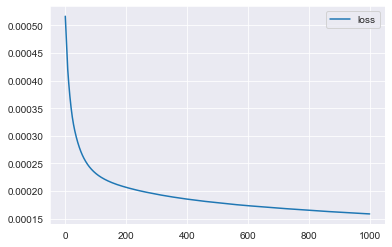

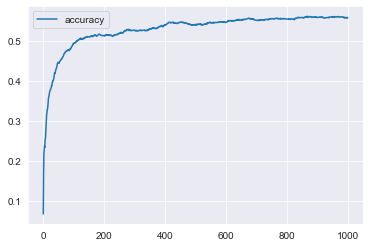

In [35]:
plt.plot(l,label='loss')
plt.legend()
plt.show()
plt.plot(acc,label='accuracy')
plt.legend()
plt.show()